In [1]:
import pandas as pd

In [2]:
url = 'https://raw.githubusercontent.com/eduardamota/curso-eba/main/07-desenho-experimento-teste-ab/df_teste.csv'

In [3]:
df_test = pd.read_csv(url)

In [4]:
df_test.head()

,Unnamed: 0,user_id,timestamp,landing_page,converted,group
0,281655,918193,2017-01-03 13:42:27.285433,new_page,1,treatment
1,7271,679658,2017-01-20 02:00:54.448676,new_page,1,treatment
2,269760,815158,2017-01-16 05:11:33.823264,new_page,1,treatment
3,158882,857307,2017-01-22 08:58:50.687626,new_page,1,treatment
4,153958,716896,2017-01-15 17:59:03.065352,new_page,1,treatment


In [5]:
df_anterior = df_test

In [6]:
#coversao atual
conversao_atual = df_anterior[df_anterior.converted==1].user_id.count()/df_anterior.user_id.count()

In [7]:
round(conversao_atual,3)

0.157

In [8]:
meta = round(conversao_atual * 1.21,3)
meta

0.19

In [9]:
#Pelo gpower a amostra minima é de 5422 nos dois grupos

#vamos testar se houve diferença entre os dois grupos

grupo_tratamento = df_test[df_test.group=='treatment']
grupo_controle = df_test[df_test.group=='control']


conversao_tratamento = grupo_tratamento[grupo_tratamento.converted==1].user_id.count()/grupo_tratamento.user_id.count()
conversao_controle = grupo_controle[grupo_controle.converted==1].user_id.count()/grupo_controle.user_id.count()

print(round(conversao_tratamento,3))
print(round(conversao_controle,3))


0.19
0.125


Numericamente conseguimos perceber uma diferença, agora precisamos verificar se a diferença foi estatisticamente significativa.

In [10]:
from statsmodels.stats.proportion import proportions_ztest, proportion_confint

control_results = grupo_controle.converted
treatment_results = grupo_tratamento.converted

sucess = [control_results.sum(), treatment_results.sum()]

n_treat = grupo_tratamento.user_id.count()
n_con = grupo_controle.user_id.count()
nobs = [n_con, n_treat]

z_stat, pvalue = proportions_ztest(sucess, nobs=nobs)
print(z_stat,pvalue)

-6.733481162342496 1.6565111652777357e-11


## Exercícios

1. A equipe de marketing do LinkedIn testou duas versões de campanhas por e-mail, A e B, em São Francisco (SF) e na cidade de Nova York (NYC). Dos 100.000 e-mails enviados, 80% dos e-mails eram da versão A, enquanto o restante era da versão B. Aborde as duas perguntas abaixo para orientar a equipe de marketing.

  a) Dado que a taxa de cliques (CTR) do e-mail A foi de 15%, enquanto a do e-mail B foi de 30%, qual versão é mais eficaz? Discorra bastante sobre o assunto


- Size: Tamanho das amostras
- CTR: Percentual de cliques
- Count: Quantidade de cliques



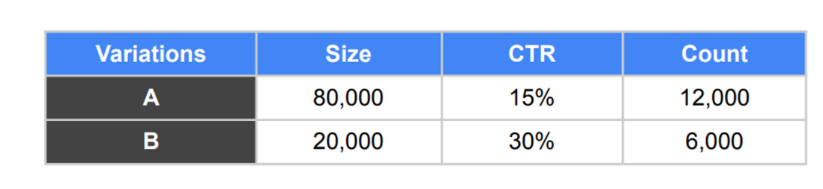

Vamos partir da hipótese que os teste foram iguais para tentar identificar se houve ou não diferença entre as amostras.

In [11]:
nobs = [80000, 20000]
clicks = [12000,6000]
z_stat, pvalue = proportions_ztest(clicks, nobs=nobs)
print(z_stat,pvalue)

-49.38647983247947 0.0


In [13]:
a = proportion_confint(clicks[0], nobs=nobs[0], alpha=0.05)
b = proportion_confint(clicks[1], nobs=nobs[1], alpha=0.05)
print(a,b)

(0.14752566675739073, 0.15247433324260926) (0.2936489908189888, 0.30635100918101116)


Como o p-valor é 0, rejeitamos a hipótese nula e logo com um nível de 95% de confiança afirmamos que a taxa de clicks é diferente entre as campanhas.


Os intervalos de confiança das duas versões não se sobrepõem, logo temos mais uma evidência que são diferentes.

  b) Em SF, a CTR do e-mail A foi de 15%, enquanto a do e-mail B foi de 12,5%. Em NYC, a CTR do e-mail A foi de 15%, enquanto a do e-mail B foi de 41,7%. A tabela resumo abaixo mostra o número de e-mails por variação por cidade. Explique sua avaliação e discorra bastante sobre o assunto


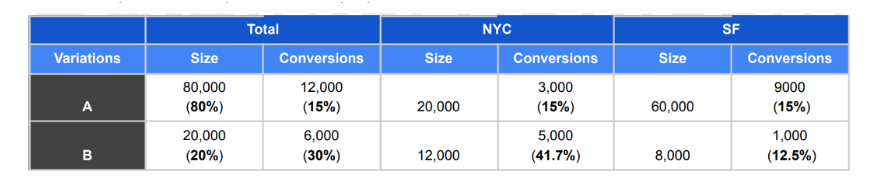

In [18]:
#NYC

nobs_nyc = [20000,12000]
clicks_nyc = [3000,5000]

zstat,p_value = proportions_ztest(clicks_nyc,nobs_nyc)
print(zstat,p_value)

a_nyc = proportion_confint(clicks_nyc[0],nobs_nyc[0],alpha=0.05)
print(f"intervalo de confiança NYC:{a_nyc}")

b_nyc = proportion_confint(clicks_nyc[1],nobs_nyc[1],alpha=0.05)
print(f"intervalo de confiança NYC:{b_nyc}")

-53.33333333333334 0.0
intervalo de confiança NYC:(0.14505133351478147, 0.15494866648521852)
intervalo de confiança NYC:(0.4078458205819289, 0.42548751275140445)


Pelo teste de proporção podemos com rejeitar a hipótese nula de que a conversão é igual nas duas variações, dado o resultado do p-valor. Além disso, pelo intervalo de confiança vemos que não temos sobreposição, sendo mais uma evidência que são diferentes e que B tem um resultado superior.

In [21]:
#SF

nobs_sf = [60000,8000]
clicks_sf = [9000,1000]

zstat,p_value = proportions_ztest(clicks_sf,nobs_sf)
print(zstat,p_value)

a_sf = proportion_confint(clicks_sf[0],nobs_sf[0],alpha=0.05)
print(f"intervalo de confiança sf:{a_sf}")

b_sf = proportion_confint(clicks_sf[1],nobs_sf[1],alpha=0.05)
print(f"intervalo de confiança sf:{b_sf}")

5.930633506894811 3.017680994773782e-09
intervalo de confiança sf:(0.1471428860726294, 0.15285711392737059)
intervalo de confiança sf:(0.117752935434662, 0.132247064565338)
